# TestCase 3

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config3.json")

### Configuration has been read from config.json ###
# dimension : 2
# testcase : 3
# version : new
# error_estimations : {'param_num': 1}
# gains : {'n_params': 50}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]  
largenet = False
if "largenet" in version:
    version = "medium" 
    largenet = True
high_degree = 10

In [4]:
assert testcase == 3
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/u2/lecourtier/Article1/code


In [8]:
testcase_dir = repo_dir + "/results/fenics/test_2D/testcase"+str(testcase)+"/"+version
if version != "new":
    from testcases.networks.test_2D.test_3.test_3_v1 import Run_laplacian2D,Poisson_2D
else:
    from testcases.networks.test_2D.test_3.test_3_v2 import Run_laplacian2D,Poisson_2D
from testcases.problem.problem_2D import TestCase3
problem = TestCase3(version=version)
if version == "medium" and largenet:
    testcase_dir += "_largenet"
from testcases.problem.problem_2D import TestCase3
problem = TestCase3(version=version)

Using device: cpu
torch loaded; device is cpu


>> load network /home/u2/lecourtier/Article1/code/networks/test_2D/test_fe3_new.pth
network loaded


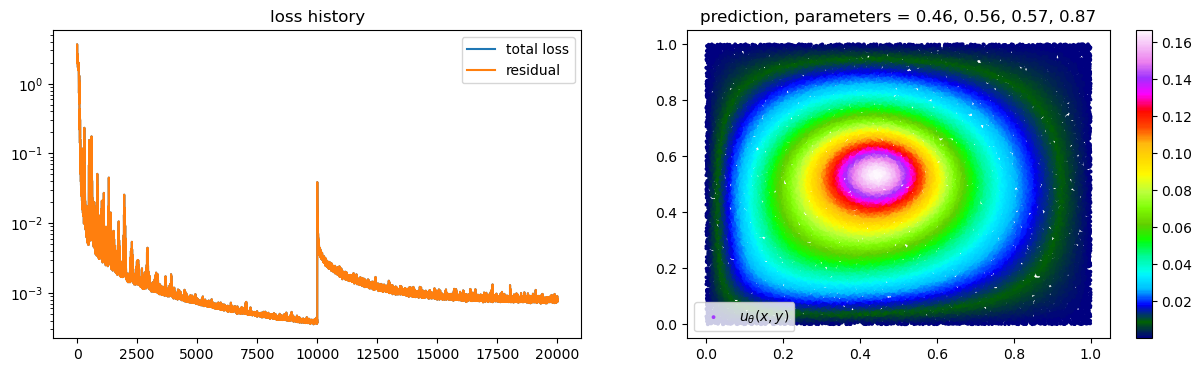

In [9]:
pde = Poisson_2D()
trainer,u_theta = Run_laplacian2D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.fem import compute_error_estimations_fem_deg,compute_error_estimations_fem_all
from modfenics.error_estimations.add import compute_error_estimations_Corr_deg,compute_error_estimations_Corr_all
from modfenics.error_estimations.mult import compute_error_estimations_Mult_deg,compute_error_estimations_Mult_all

from modfenics.error_estimations.compare import plot_Corr_vs_FEM_alldeg
from modfenics.error_estimations.compare import plot_Mult_vs_FEM_alldeg_allM,plot_Mult_vs_Add_vs_FEM_alldeg_allM
from modfenics.error_estimations.compare import save_tab_alldeg_allM

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
param_num = config["error_estimations"]["param_num"]     
result_dir = testcase_dir + "/cvg/param"+str(param_num)+"/"
create_tree(result_dir)

### Run FEM

In [14]:
degree = 1
df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_estimations_fem_deg(param_num,problem,degree,high_degree,new_run=False,result_dir=result_dir)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/u_ref/u_ref_1.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv


/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvgu_ref/u_ref_1.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/FEM_case3_vnew_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvgu_ref/u_ref_1.npy
## Run error estimation with FEM for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
Time to generate V_ex:  2.7612576484680176
V_ref created with  1000  vertices and degree  3
Load reference solution
Time to generate mesh:  0.0001385211944580078
V created with  16  vertices and degree  4  : h = 0.09428090415820647
f is considered for new version
Time to assemble the matrix :  0.5116446018218994
Time to solve the system : 0.01711869239807129
Time to compute the error : 5.6780781745910645
nb_vert=16, norme_L2=0.001090016930187859
Time to generate mesh:  0.0002799034118652344
V created with  32  vertices and degree  4  : h = 0.0456197923

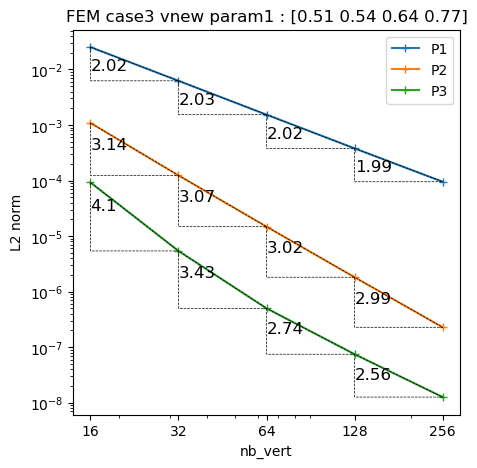

In [34]:
compute_error_estimations_fem_all(param_num,problem,high_degree,new_run=False,result_dir=result_dir,plot_cvg=True)

### Run Add

In [35]:
degree = 1
df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_estimations_Corr_deg(param_num,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/u_ref/u_ref_1.npy
## Run error estimation with Corr (add) for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
Time to generate V_ex:  2.682816743850708
V_ref created with  1000  vertices and degree  3
Computing reference solution
f is considered for new version
Time to generate mesh:  0.00029969215393066406
V created with  16  vertices and degree  4  : h = 0.09428090415820647
f is considered for new version
Time to assemble the matrix :  0.7537226676940918
Time to solve the system : 0.006488800048828125
u_theta_Vex
Time to compute the error : 9.371286153793335
nb_vert=16, norme_L2=0.0006225946817252036
Time to generate mesh:  0.00015282630920410156
V created with  32  vertices and degree  4  : h = 0.045619792334616084
f is considered for new version
Time to assemble the matrix :  3.1409921646118164
Time to solve the system : 0.023728132247924805
u_theta_Vex
Time to 

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/u_ref/u_ref_1.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Corr_case3_vnew_param1_degree1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/u_ref/u_ref_1.npy
## Run error estimation with Corr (add) for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
Time to generate V_ex:  2.99989914894104
V_ref created with  1000  vertices and degree  3
Load reference solution
Time to generate mesh:  0.00014901161193847656
V created with  16  vertices and degree  4  : h = 0.09428090415820647
f is considered for new version
Time to assemble the matrix :  0.6288785934448242
Time to solve the system : 0.02096247673034668
u_theta_Vex
Time to compute the error : 11.148902177810669
nb_vert=16, norme_L2=6.429352842233284e-05
Time to generate mesh:  0.00016641616821289062
V created with  32  verti

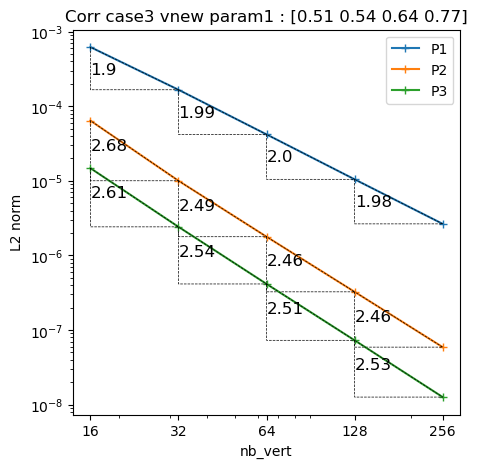

In [36]:
compute_error_estimations_Corr_all(param_num,problem,high_degree,u_theta,new_run=False,result_dir=result_dir,plot_cvg=True)

### Run Mult

In [37]:
tab_M = [0.0,0.1,1.0,100.0]

In [38]:
degree = 1
for M in tab_M:
    print("#### M = ",M)
    df_Mult, tab_nb_vert_Mult, tab_h_Mult, tab_err_Mult = compute_error_estimations_Mult_deg(param_num,problem,degree,high_degree,u_theta,M=M,new_run=False,result_dir=result_dir)

#### M =  0.0
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/u_ref/u_ref_1.npy
## Run error estimation with Corr (mult) for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
Time to generate V_ex:  3.050520420074463
V_ref created with  1000  vertices and degree  3
Load reference solution
Time to generate mesh:  0.0001270771026611328
V created with  16  vertices and degree  4  : h = 0.09428090415820647
f is considered for new version
Time to assemble the matrix :  0.6981303691864014
Time to solve the system : 0.005831241607666016
Time to compute the error : 11.02168083190918
nb_vert=16, norme_L2=0.002068708830830516
Time to generate mesh:  0.0001785755157470703
V created with  32  vertices and degree  4  : h = 0.045619792334616084
f is considered for new version
Time to assemble the matrix :  2.639322519302368
Time to solve the system : 0.025810956954956055
Time to compute the error : 11.333374500274658
nb_vert=32,

#### M =  0.0
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/u_ref/u_ref_1.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M0.0.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/u_ref/u_ref_1.npy
## Run error estimation with Corr (mult) for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
Time to generate V_ex:  2.8274827003479004
V_ref created with  1000  vertices and degree  3
Load reference solution
Time to generate mesh:  0.00010752677917480469
V created with  16  vertices and degree  4  : h = 0.09428090415820647
f is considered for new version
Time to assemble the matrix :  0.662513256072998
Time to solve the system : 0.015935182571411133
Time to compute the error : 10.699622631072998
nb_vert=16, norme_L2=0.000833170884331183
Time to generate mesh:  0.0001575946807861328
V created with  3

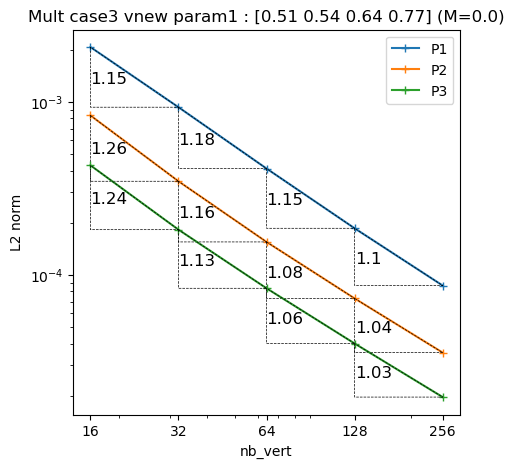

#### M =  0.1
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/u_ref/u_ref_1.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M0.1.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/u_ref/u_ref_1.npy
## Run error estimation with Corr (mult) for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
Time to generate V_ex:  3.4967799186706543
V_ref created with  1000  vertices and degree  3
Load reference solution
Time to generate mesh:  0.00022602081298828125
V created with  16  vertices and degree  4  : h = 0.09428090415820647
f is considered for new version
Time to assemble the matrix :  0.6203877925872803
Time to solve the system : 0.019900083541870117
Time to compute the error : 10.908812046051025
nb_vert=16, norme_L2=6.756202332778335e-05
Time to generate mesh:  0.00021648406982421875
V created with

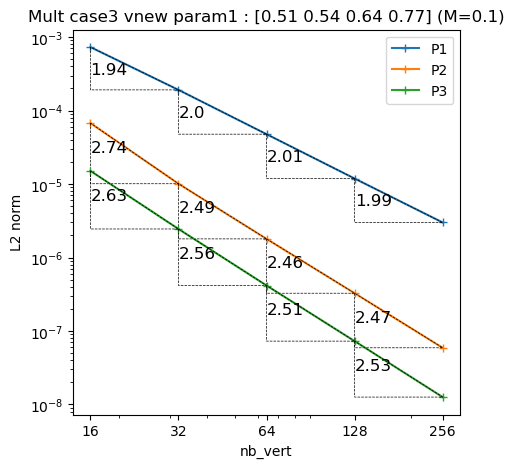

#### M =  1.0
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/u_ref/u_ref_1.npy
## Read csv file /home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/Mult_case3_vnew_param1_degree1_M1.0.csv
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/new/cvg/param1/u_ref/u_ref_1.npy
## Run error estimation with Corr (mult) for degree=2
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
Time to generate V_ex:  3.4235589504241943
V_ref created with  1000  vertices and degree  3
Load reference solution
Time to generate mesh:  0.00026416778564453125
V created with  16  vertices and degree  4  : h = 0.09428090415820647
f is considered for new version
Time to assemble the matrix :  0.620729923248291
Time to solve the system : 0.021617650985717773
Time to compute the error : 11.23502802848816
nb_vert=16, norme_L2=6.453739831813341e-05
Time to generate mesh:  0.00019884109497070312
V created with  

In [ ]:
for M in tab_M:
    print("#### M = ",M)
    compute_error_estimations_Mult_all(param_num,problem,high_degree,u_theta,M=M,new_run=False,result_dir=result_dir,plot_cvg=True)

### Save results

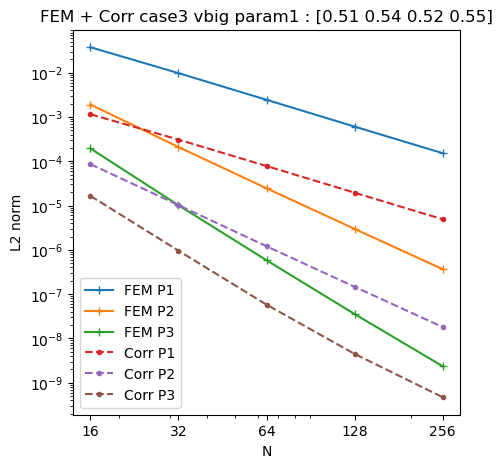

In [ ]:
plot_Corr_vs_FEM_alldeg(param_num,problem,result_dir=result_dir)

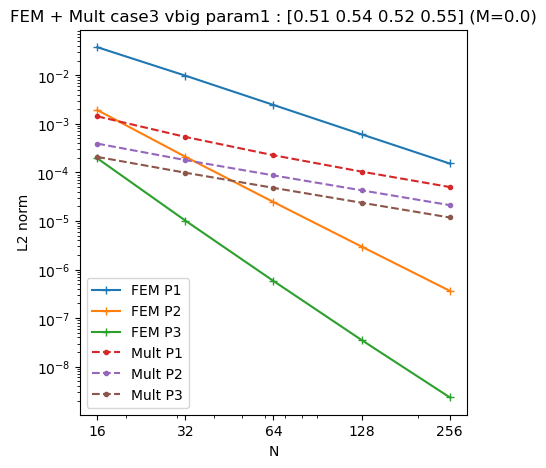

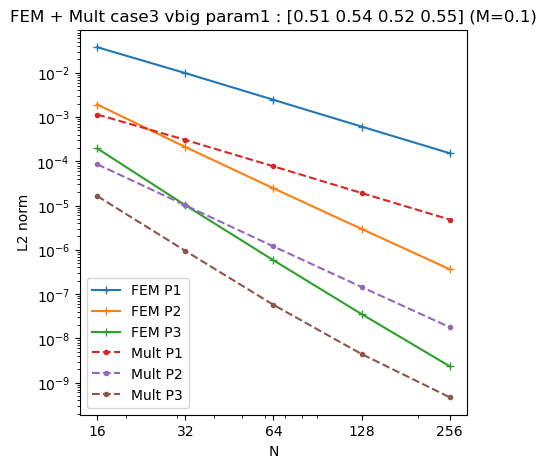

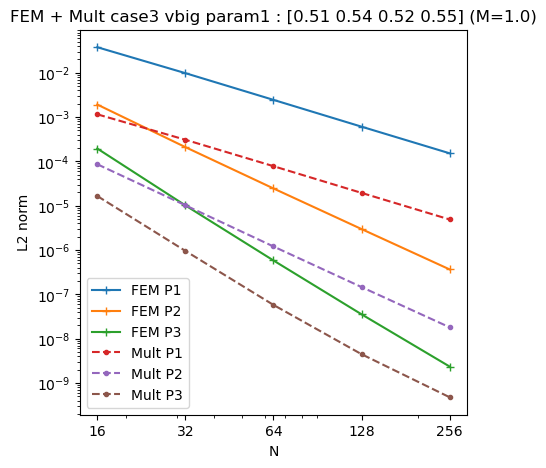

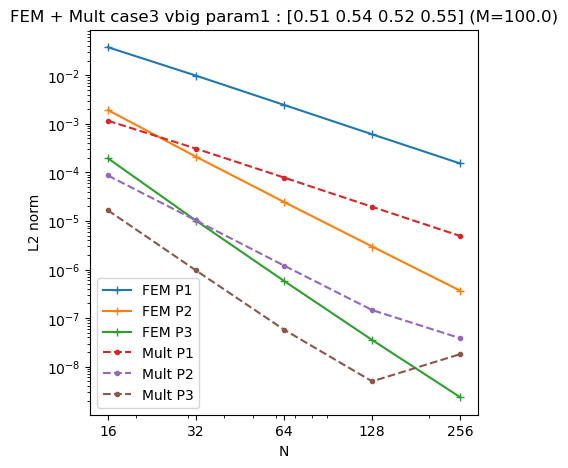

In [ ]:
plot_Mult_vs_FEM_alldeg_allM(param_num,problem,tab_M,result_dir=result_dir)

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param1/Mult_case3_vbig_param1_degree1_M0.0.csv
Mult weak P1 M0.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param1/Mult_case3_vbig_param1_degree1_M0.1.csv
Mult weak P1 M0.1 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param1/Mult_case3_vbig_param1_degree1_M1.0.csv
Mult weak P1 M1.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param1/Mult_case3_vbig_param1_degree1_M100.0.csv
Mult weak P1 M100.0 not found


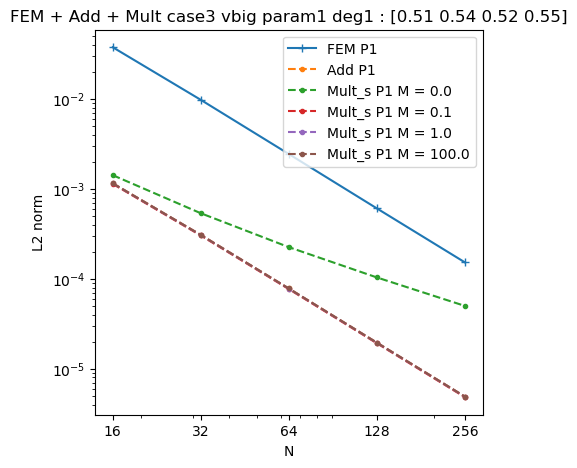

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param1/Mult_case3_vbig_param1_degree2_M0.0.csv
Mult weak P2 M0.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param1/Mult_case3_vbig_param1_degree2_M0.1.csv
Mult weak P2 M0.1 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param1/Mult_case3_vbig_param1_degree2_M1.0.csv
Mult weak P2 M1.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param1/Mult_case3_vbig_param1_degree2_M100.0.csv
Mult weak P2 M100.0 not found


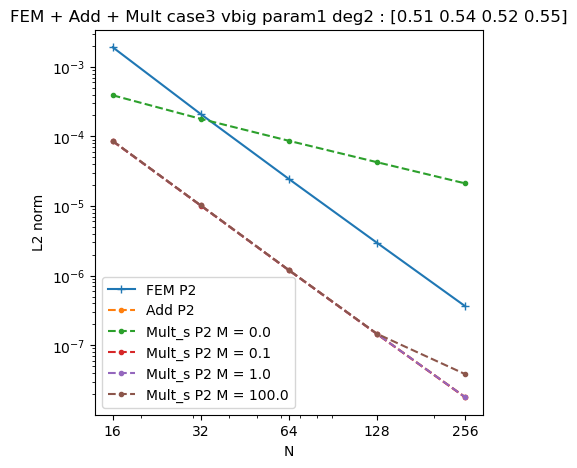

/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param1/Mult_case3_vbig_param1_degree3_M0.0.csv
Mult weak P3 M0.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param1/Mult_case3_vbig_param1_degree3_M0.1.csv
Mult weak P3 M0.1 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param1/Mult_case3_vbig_param1_degree3_M1.0.csv
Mult weak P3 M1.0 not found
/home/u2/lecourtier/Article1/code/results/fenics/test_2D/testcase3/big/cvg/param1/Mult_case3_vbig_param1_degree3_M100.0.csv
Mult weak P3 M100.0 not found


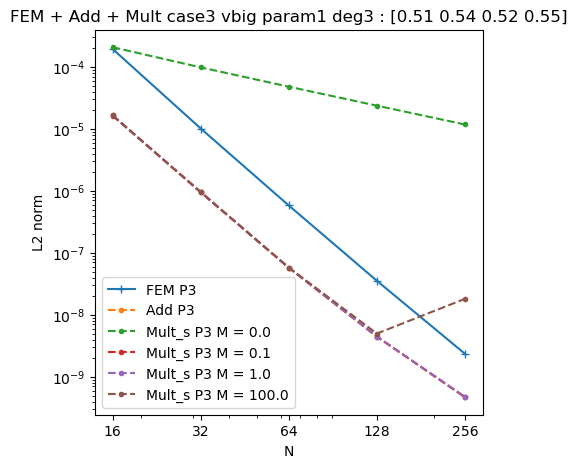

In [ ]:
plot_Mult_vs_Add_vs_FEM_alldeg_allM(param_num,problem,tab_M,result_dir=result_dir)

In [ ]:
save_tab_alldeg_allM(param_num,problem,tab_M,result_dir=result_dir)

Mult weak P1 M0.0 not found
Mult weak P1 M0.1 not found
Mult weak P1 M1.0 not found
Mult weak P1 M100.0 not found
Mult weak P2 M0.0 not found
Mult weak P2 M0.1 not found
Mult weak P2 M1.0 not found
Mult weak P2 M100.0 not found


/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:203: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:207: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:203: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:207: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


Mult weak P3 M0.0 not found
Mult weak P3 M0.1 not found
Mult weak P3 M1.0 not found
Mult weak P3 M100.0 not found


/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:203: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:207: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


## Gains

### Imports

In [48]:
from modfenics.gains.fem import compute_error_fem_deg,compute_error_fem_all
from modfenics.gains.pinns import compute_error_pinns_deg,compute_error_pinns_all
from modfenics.gains.add import compute_error_Corr_deg,compute_error_Corr_all
from modfenics.gains.compare import create_dataframes_deg,create_dataframes_all,save_stats_deg,save_stats_all

In [49]:
n_params = config["gains"]["n_params"]   
result_dir = testcase_dir + "/gains/"
create_tree(result_dir) 

### Run FEM

In [50]:
degree = 1
df_FEM, tab_nb_vert_FEM, tab_h_FEM, tab_err_FEM = compute_error_fem_deg(n_params,problem,degree,high_degree,new_run=False,result_dir=result_dir)

## Run gains with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0028284271247461927
Time to generate V_ex:  2.8617634773254395


AssertionError: 

In [ ]:
# compute_error_fem_all(n_params,problem,high_degree,new_run=False,result_dir=result_dir)

### Run PINNs

In [ ]:
degree = 1
df_PINNs, tab_nb_vert_PINNs, tab_h_PINNs, tab_err_PINNs = compute_error_pinns_deg(n_params,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase1/version1/gains/PINNs_errors_case1_v1_degree1.csv


In [ ]:
# compute_error_pinns_all(n_params,problem,high_degree,u_theta,new_run=False,result_dir=result_dir)

### Run Add

In [ ]:
degree = 1
df_Corr, tab_nb_vert_Corr, tab_h_Corr, tab_err_Corr = compute_error_Corr_deg(n_params,problem,degree,high_degree,u_theta,new_run=False,result_dir=result_dir)

## Read csv file /home/flecourtier/Bureau/Article1/code/results/fenics/test_2D/testcase1/version1/gains/Corr_errors_case1_v1_degree1.csv


In [ ]:
# compute_error_Corr_all(n_params,problem,high_degree,u_theta,new_run=False,result_dir=result_dir)

### Compare methods

In [ ]:
degree = 1
df_errors,df_gains = create_dataframes_deg(n_params,problem,degree,result_dir=result_dir)

In [ ]:
# create_dataframes_all(n_params,problem,result_dir=result_dir)

In [ ]:
df_stats_Add = save_stats_deg(n_params,problem,degree,result_dir=result_dir)